# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mohammad Sihabudin Al Qurtubi
- **Email:** malqurtubi17@gmail.com
- **ID Dicoding:** malqurtubi17

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca (weathersit, temp, hum, windspeed) dan musim (season) terhadap jumlah penyewaan sepeda (cnt)?
- Pada jam berapa dalam sehari dan hari apa dalam seminggu terjadi lonjakan penyewaan sepeda tertinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv('data/day.csv')
hour = pd.read_csv('data/hour.csv')

In [3]:
print('Kolom data bike sharing in day')
print(day.columns)
print('\nKolom data bike sharing in hour')
print(hour.columns)

print('Banyak data bike sharing in day', len(day))
print('Banyak data bike sahring in hour', len(hour))

Kolom data bike sharing in day
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Kolom data bike sharing in hour
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Banyak data bike sharing in day 731
Banyak data bike sahring in hour 17379


In [4]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset terdiri dari dua file: hour.csv (data per jam) dan day.csv (data per hari).
- Kedua dataset memiliki variabel yang sama, kecuali hr (jam) yang hanya ada di hour.csv.
- Dataset day.csv memiliki 731 baris (days), yang berarti data dikumpulkan selama 2 tahun (2011-2012).
- Dataset hour.csv memiliki 17.379 baris, yang berarti ada data per jam selama 2 tahun, mencerminkan pola harian lebih detail.

### Assessing Data

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("Jumlah duplikasi data bike sharing in day: ", day.duplicated().sum())
day.describe()

Jumlah duplikasi data bike sharing in day:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
print("Jumlah duplikasi data bike sharing in hour: ", hour.duplicated().sum())
hour.describe()

Jumlah duplikasi data bike sharing in hour:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [28]:
# Membuat fungsi untuk mengecek jumlah outlier pada suatu kolom.
def check_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    #Inisiasi batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Melakukan pengecekan outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return len(outliers)

print('Outlier pada kolom cnt di dataset bike sharing in day:', check_outliers_iqr(day, 'cnt'))
print('Outlier pada kolom cnt di dataset bike sharing in hour:', check_outliers_iqr(hour, 'cnt'))

Outlier pada kolom cnt di dataset bike sharing in day: 0
Outlier pada kolom cnt di dataset bike sharing in hour: 505


**Insight:**
- Pada dataset bike sharing in day, tidak terdapat missing value, outlier pada kolom 'cnt', maupun duplikasi data. Namun, terdapat kesalahan tipe data pada kolom dteday, yang seharusnya direpresentasikan dalam format datetime karena berisi informasi tanggal.
- Pada dataset bike sharing in hour, tidak terdapat missing value maupun duplikasi data. Namun, terdapat kesalahan tipe data pada kolom dteday, yang seharusnya menggunakan format datetime karena merepresentasikan tanggal. Selain itu, terdapat 505 outlier pada kolom cnt.

### Cleaning Data

In [4]:
# Membuat fungsi untuk menghapus outlier
def remove_outliers_iqr(df, column):
    """
    Menghapus outlier dari kolom yang dipilih menggunakan metode IQR.

    Parameters:
    df (pd.DataFrame): DataFrame yang akan diproses
    column (str): Nama kolom yang ingin dicek outliernya

    Returns:
    pd.DataFrame: DataFrame tanpa outlier
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_clean

hour = remove_outliers_iqr(hour, 'cnt')
print("Ukuran dataset sesudah menghapus outlier pada dataset bike sharing in hour:", hour.shape)

Ukuran dataset sesudah menghapus outlier pada dataset bike sharing in hour: (16874, 17)


In [30]:
# Mengubah tipe data object menjadi datetime pada kolom dteday
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [31]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [32]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  int64         
 3   yr          16874 non-null  int64         
 4   mnth        16874 non-null  int64         
 5   hr          16874 non-null  int64         
 6   holiday     16874 non-null  int64         
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  int64         
 9   weathersit  16874 non-null  int64         
 10  temp        16874 non-null  float64       
 11  atemp       16874 non-null  float64       
 12  hum         16874 non-null  float64       
 13  windspeed   16874 non-null  float64       
 14  casual      16874 non-null  int64         
 15  registered  16874 non-null  int64         
 16  cnt         16874 non-null 

**Insight:**
- Data outlier pada dataset Bike Sharing in day sudah dibersihkan sebanyak 505 data sehingga data yang ada sekarang berjumlah 16874 baris
- Kolom dteday pada dataset Bike Sharing in day maupun hour sudah dibetulkan menjadi tipe data datetime bukan object

## Exploratory Data Analysis (EDA)

### Explore ...

In [41]:
print('Melihat Nilai Tertinggi, Terendah, dan Rerata dari cnt berdasarkan kondisi cuaca pada data bike sharing in hour')
hour.groupby("weathersit")["cnt"].agg(["max", "min", "mean"])

Melihat Nilai Tertinggi, Terendah, dan Rerata dari cnt berdasarkan kondisi cuaca pada data bike sharing in hour


,max,min,mean
weathersit,,,
1,642,1,185.314247
2,642,1,162.626463
3,627,1,106.050462
4,164,23,74.333333


In [42]:
print('Melihat Nilai Tertinggi, Terendah, dan Rerata dari cnt berdasarkan kondisi cuaca pada data bike sharing in day')
day.groupby("weathersit")["cnt"].agg(["max", "min", "mean"])

Melihat Nilai Tertinggi, Terendah, dan Rerata dari cnt berdasarkan kondisi cuaca pada data bike sharing in day


,max,min,mean
weathersit,,,
1,8714,431,4876.786177
2,8362,605,4035.862348
3,4639,22,1803.285714


In [55]:
print('Penyewaan tertinggi berdasarkan tanggal dan temperatur pada data bike sharing in hour')
hour.loc[hour["cnt"].idxmax(), ["dteday", "temp", "cnt"]]

Penyewaan tertinggi berdasarkan tanggal dan temperatur pada data bike sharing in hour


,11983
dteday,2012-05-19 00:00:00
temp,0.66
cnt,642


In [56]:
print('Penyewaan tertinggi berdasarkan tanggal dan temperatur pada data bike sharing in day')
day.loc[day["cnt"].idxmax(), ["dteday", "temp", "cnt"]]

Penyewaan tertinggi berdasarkan tanggal dan temperatur pada data bike sharing in day


,623
dteday,2012-09-15 00:00:00
temp,0.608333
cnt,8714


In [44]:
print('Melihat Nilai Tertinggi, Terendah, dan Rerata dari cnt berdasarkan hari kerja pada data bike sharing in hour')
hour.groupby("workingday")["cnt"].agg(["max", "min", "mean"])

Melihat Nilai Tertinggi, Terendah, dan Rerata dari cnt berdasarkan hari kerja pada data bike sharing in hour


,max,min,mean
workingday,,,
0,642,1,172.913885
1,642,1,172.613658


In [43]:
print('Melihat Nilai Tertinggi, Terendah, dan Rerata dari cnt berdasarkan hari kerja pada data bike sharing in hour')
day.groupby("workingday")["cnt"].agg(["max", "min", "mean"])

Melihat Nilai Tertinggi, Terendah, dan Rerata dari cnt berdasarkan hari kerja pada data bike sharing in hour


,max,min,mean
workingday,,,
0,8714,605,4330.168831
1,8362,22,4584.820000


In [57]:
print('Melihat Nilai Tertinggi, Terendah, dan Rerata dari cnt berdasarkan musim pada data bike sharing in hour')
hour.groupby("season")["cnt"].agg(["max", "min", "mean"])

Melihat Nilai Tertinggi, Terendah, dan Rerata dari cnt berdasarkan musim pada data bike sharing in hour


,max,min,mean
season,,,
1,623,1,108.410609
2,642,1,189.459440
3,641,1,211.527687
4,642,1,180.872195


In [58]:
print('Melihat Nilai Tertinggi, Terendah, dan Rerata dari cnt berdasarkan musim pada data bike sharing in day')
day.groupby("season")["cnt"].agg(["max", "min", "mean"])

Melihat Nilai Tertinggi, Terendah, dan Rerata dari cnt berdasarkan musim pada data bike sharing in day


,max,min,mean
season,,,
1,7836,431,2604.132597
2,8362,795,4992.331522
3,8714,1115,5644.303191
4,8555,22,4728.162921


**Insight:**
## Pada dataset Bike Sharing in Day:
1.   Dari segi kondisi cuaca, penyewaan tertinggi terjadi saat cuaca cerah (weathersit = 1) dengan rata-rata 4.876 sepeda/hari, sedangkan penyewaan terendah terjadi saat cuaca buruk seperti hujan lebat atau salju tebal (weathersit = 4) dengan rata-rata 1.803 sepeda/hari.
2.   Penyewaan tertinggi tercatat pada 15 September 2012 dengan 8.714 penyewaan, yang bertepatan dengan suhu sekitar 26°C.
3.   Dari segi hari kerja, penyewaan pada hari kerja (4.584 sepeda/hari) sedikit lebih tinggi dibandingkan hari libur (4.330 sepeda/hari), mengindikasikan bahwa sepeda lebih banyak digunakan untuk aktivitas rutin seperti bekerja atau sekolah.
4.   Dari segi musim, penyewaan tertinggi terjadi pada musim gugur (season = 3) dengan rata-rata 5.644 sepeda/hari, sementara penyewaan terendah terjadi pada musim semi (season = 1) dengan rata-rata 2.604 sepeda/hari.

## Pada dataset Bike Sharing in Hour:

1.   Dari segi kondisi cuaca, rata-rata penyewaan tertinggi terjadi saat cuaca cerah (185 sepeda/jam) dan terendah saat cuaca buruk (74 sepeda/jam).
2.   Penyewaan tertinggi tercatat pada 19 Mei 2012 dengan 642 penyewaan dalam satu jam, saat suhu sekitar 23°C.
3.   Dari segi hari kerja, rata-rata penyewaan sepeda per jam hampir sama pada hari kerja (172 sepeda/jam) dan hari libur (172 sepeda/jam), menunjukkan bahwa pola penggunaan sepeda harian tidak terlalu berbeda.
4.   Dari segi musim, penyewaan tertinggi terjadi pada musim gugur (211 sepeda/jam) dan terendah pada musim semi (108 sepeda/jam), selaras dengan tren yang terlihat pada data harian.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

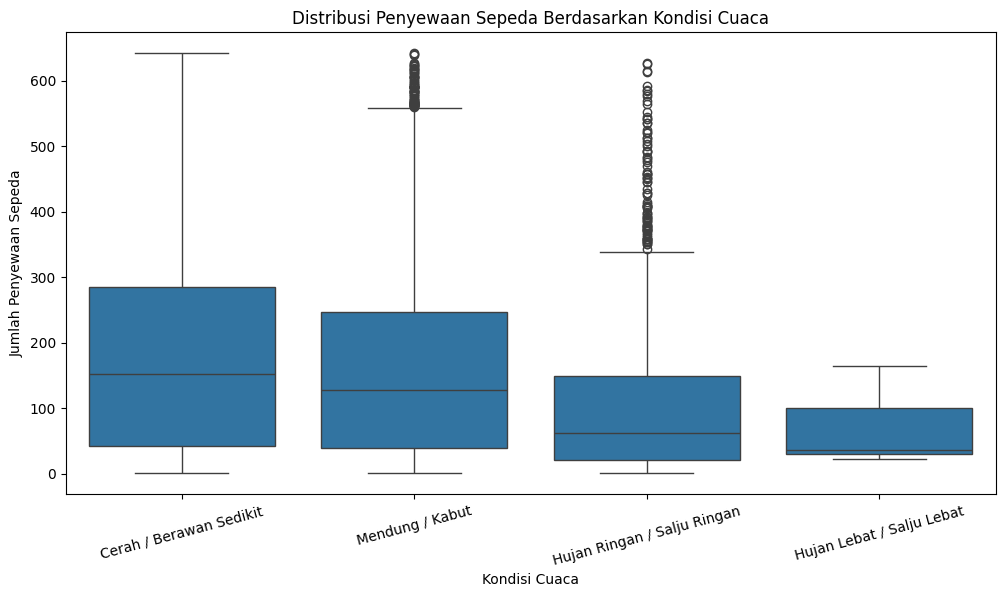

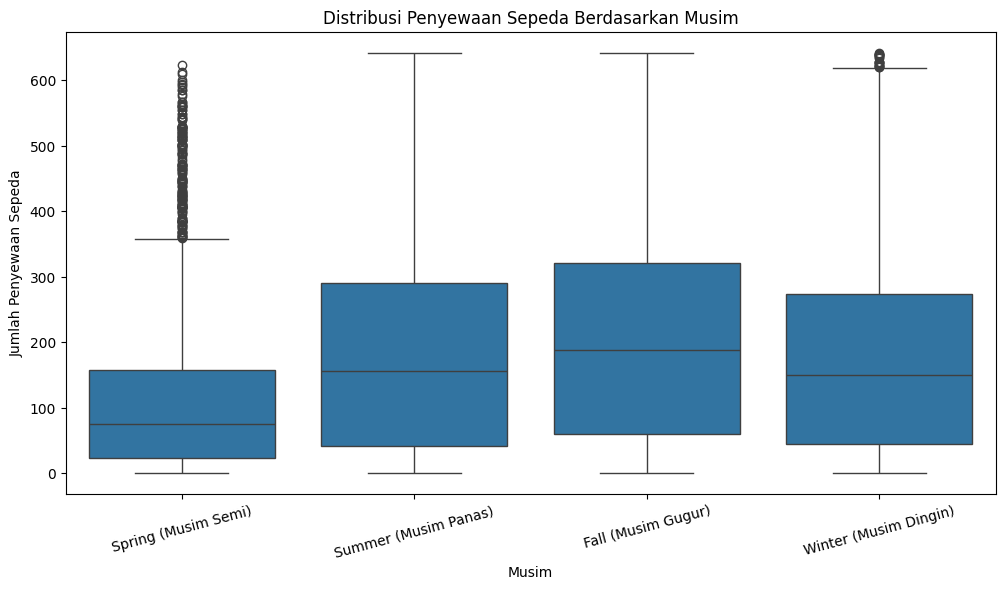

In [62]:
# Mapping kategori untuk kondisi cuaca (weathersit)
weathersit_labels = {
    1: "Cerah / Berawan Sedikit",
    2: "Mendung / Kabut",
    3: "Hujan Ringan / Salju Ringan",
    4: "Hujan Lebat / Salju Lebat"
}

# Mapping kategori untuk musim (season)
season_labels = {
    1: "Spring (Musim Semi)",
    2: "Summer (Musim Panas)",
    3: "Fall (Musim Gugur)",
    4: "Winter (Musim Dingin)"
}

# Gantilah angka dengan label kategori
hour["weathersit_label"] = hour["weathersit"].replace(weathersit_labels)
hour["season_label"] = hour["season"].replace(season_labels)

# Plot Boxplot untuk Kondisi Cuaca
plt.figure(figsize=(12, 6))
sns.boxplot(x="weathersit_label", y="cnt", data=hour, order=weathersit_labels.values())
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(rotation=15)  # Memiringkan label agar lebih mudah dibaca
plt.show()

# Plot Boxplot untuk Musim
plt.figure(figsize=(12, 6))
sns.boxplot(x="season_label", y="cnt", data=hour, order=season_labels.values())
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(rotation=15)
plt.show()

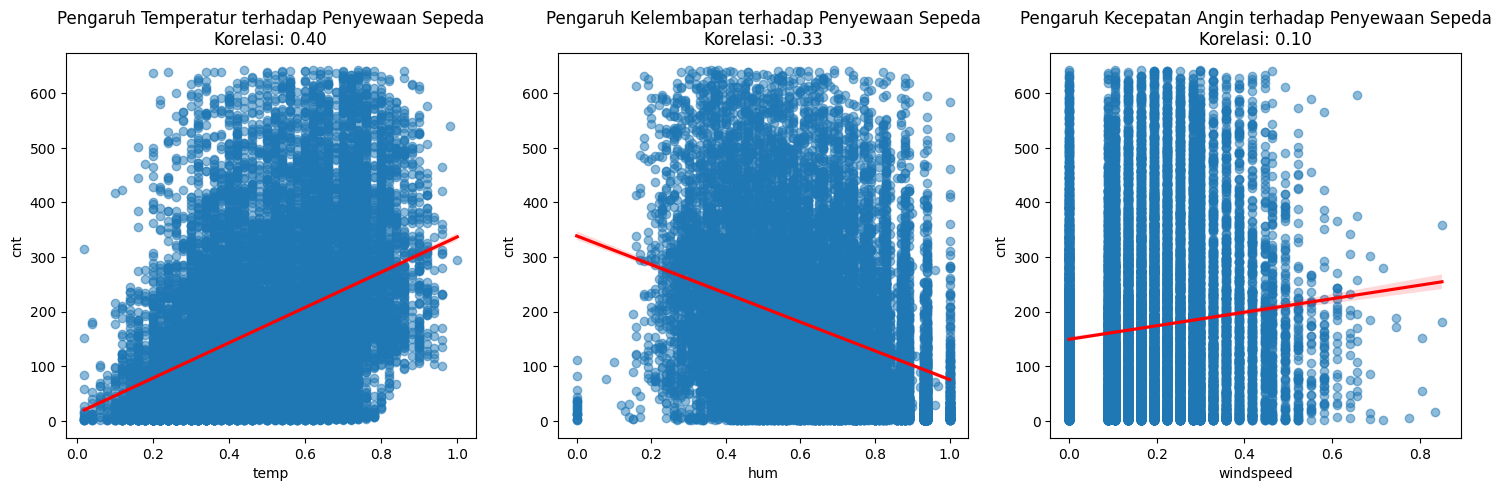

In [61]:
# Menghitung korelasi Pearson
corr_temp = hour["temp"].corr(hour["cnt"])
corr_hum = hour["hum"].corr(hour["cnt"])
corr_windspeed = hour["windspeed"].corr(hour["cnt"])

# Membuat scatter plot dengan garis regresi
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot temperatur
sns.regplot(x="temp", y="cnt", data=hour, ax=axes[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0].set_title(f"Pengaruh Temperatur terhadap Penyewaan Sepeda\nKorelasi: {corr_temp:.2f}")

# Scatter plot kelembapan
sns.regplot(x="hum", y="cnt", data=hour, ax=axes[1], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[1].set_title(f"Pengaruh Kelembapan terhadap Penyewaan Sepeda\nKorelasi: {corr_hum:.2f}")

# Scatter plot kecepatan angin
sns.regplot(x="windspeed", y="cnt", data=hour, ax=axes[2], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[2].set_title(f"Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda\nKorelasi: {corr_windspeed:.2f}")

plt.show()

### Pertanyaan 2:

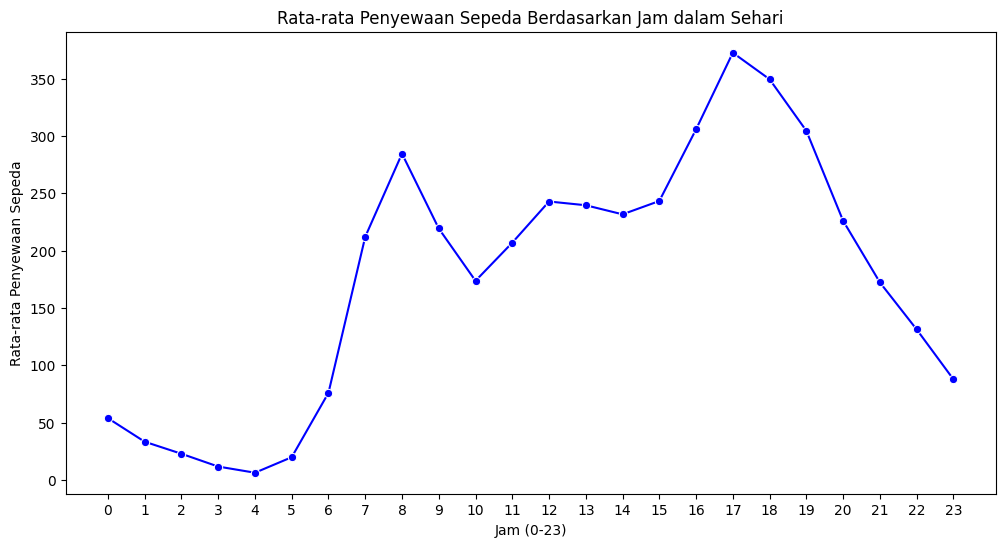

In [9]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata penyewaan
hourly_rentals = hour.groupby("hr")["cnt"].mean()

# Membuat line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker="o", color="b")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari")
plt.xlabel("Jam (0-23)")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(range(0, 24))  # Menampilkan semua jam di sumbu x
plt.show()

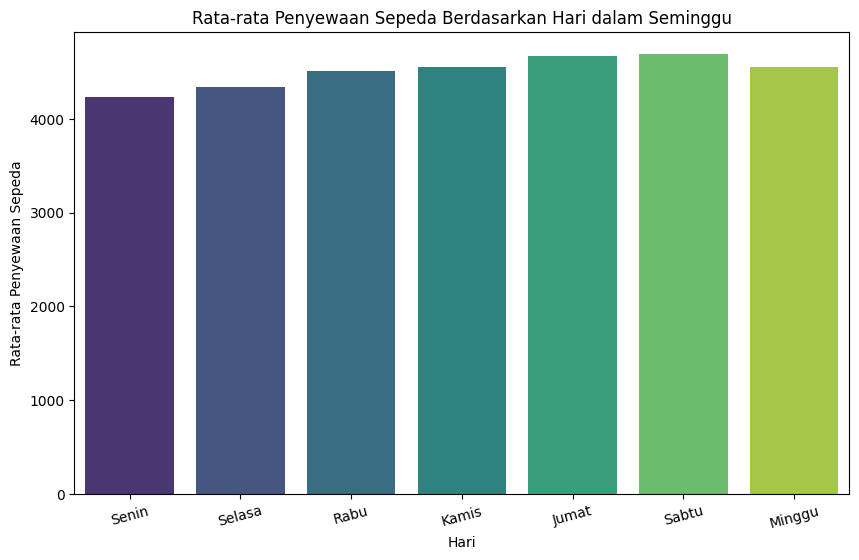

In [11]:
# Mapping nama hari
day_labels = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

# Mengelompokkan data berdasarkan hari dalam seminggu
daily_rentals = day.groupby("weekday")["cnt"].mean()

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=day_labels, y=daily_rentals.values, palette="viridis")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(rotation=15)  # Agar label terlihat jelas
plt.show()

<ipython-input-67-661655aa06bc>:2: FutureWarning: The provided callable <function mean at 0x7982fc35e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = hour.pivot_table(values="cnt", index="hr", columns="weekday", aggfunc=np.mean)


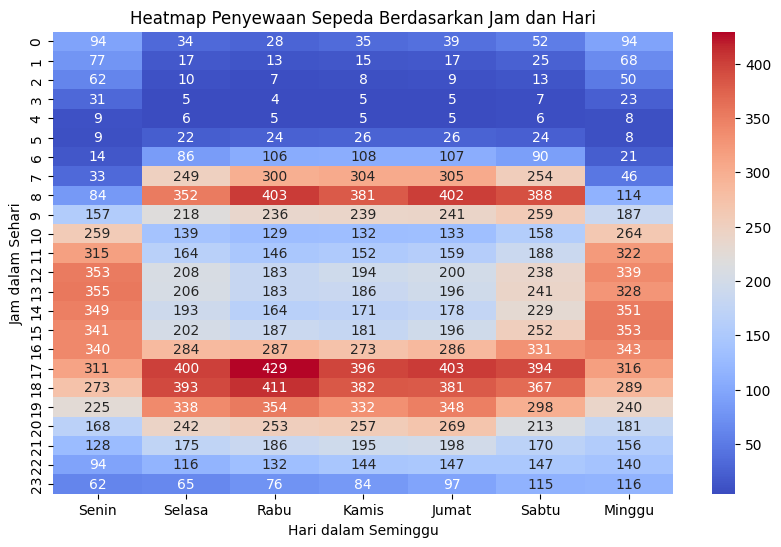

In [67]:
# Mengelompokkan data berdasarkan jam dan hari dalam seminggu
heatmap_data = hour.pivot_table(values="cnt", index="hr", columns="weekday", aggfunc=np.mean)

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", xticklabels=day_labels, yticklabels=range(0, 24))
plt.title("Heatmap Penyewaan Sepeda Berdasarkan Jam dan Hari")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jam dalam Sehari")
plt.show()

**Insight:**
- Berdasarkan nilai korelasi, temperatur memiliki pengaruh positif terhadap jumlah penyewaan sepeda dengan korelasi 0,4, yang menunjukkan hubungan sedang—artinya, semakin tinggi suhu, semakin banyak sepeda yang disewa. Kelembapan memiliki korelasi negatif sebesar -0,33, yang berarti semakin tinggi kelembapan, jumlah penyewaan cenderung menurun, meskipun pengaruhnya juga sedang. Sementara itu, kecepatan angin memiliki korelasi yang sangat lemah, yaitu 0,1, sehingga hampir tidak berpengaruh terhadap jumlah penyewaan sepeda.

- Untuk faktor kategorik seperti musim dan kondisi cuaca, dari visualisasi boxplot terlihat bahwa musim memiliki pengaruh terhadap jumlah penyewaan, di mana musim panas dan gugur memiliki jumlah penyewaan lebih tinggi dibandingkan musim semi dan dingin, menunjukkan pengaruh positif. Sementara itu, kondisi cuaca juga berpengaruh negatif terhadap penyewaan, di mana cuaca cerah atau sedikit berawan cenderung meningkatkan jumlah penyewaan, sedangkan kondisi mendung, hujan, atau salju menyebabkan penurunan jumlah penyewaan.

- Berdasarkan analisis penyewaan sepeda terhadap waktu dalam sehari dan hari dalam seminggu, terlihat bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada jam-jam sibuk, khususnya pagi hari sekitar pukul 07:00-09:00 dan sore hingga malam hari sekitar pukul 16:00-19:00. Hal ini mengindikasikan bahwa penyewaan sepeda banyak digunakan untuk keperluan perjalanan kerja atau sekolah. Sementara itu, pada dini hari hingga subuh (00:00-05:00), jumlah penyewaan sangat rendah.

- Dari sisi hari dalam seminggu, penyewaan sepeda cenderung stabil dari Senin hingga Minggu, dengan tren sedikit lebih tinggi pada hari Jumat dan Sabtu. Hal ini menunjukkan bahwa penyewaan sepeda cukup konsisten sepanjang minggu, tetapi meningkat menjelang akhir pekan, kemungkinan karena aktivitas rekreasi yang lebih tinggi. Secara keseluruhan, tren ini menunjukkan bahwa penyewaan sepeda sangat dipengaruhi oleh pola aktivitas harian dan mingguan masyarakat.

## Analisis Lanjutan (Clustering)

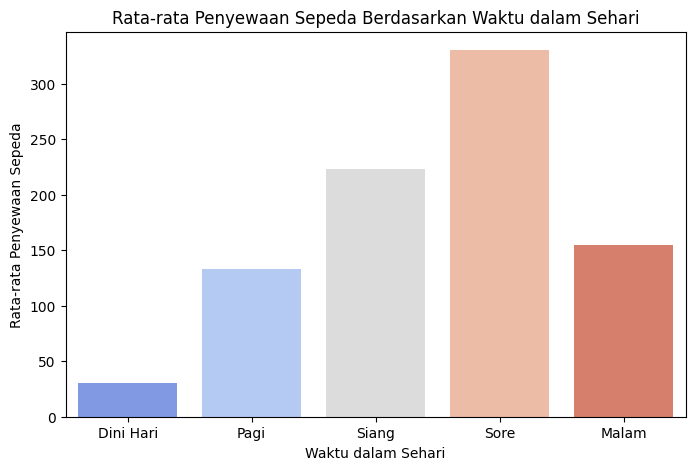

In [74]:
# Definisi kategori waktu dalam sehari
bins = [0, 3, 9, 15, 19, 23]  # Batas bin
labels = ["Dini Hari", "Pagi", "Siang", "Sore", "Malam"]  # Nama kategori unik

# Membuat kolom baru dengan kategori waktu
hour["time_of_day"] = pd.cut(hour["hr"], bins=bins, labels=labels, include_lowest=True, ordered=True)

# Hitung rata-rata jumlah penyewaan berdasarkan kategori waktu
time_avg = hour.groupby("time_of_day")["cnt"].mean()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=time_avg.index, y=time_avg.values, palette="coolwarm")
plt.xlabel("Waktu dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Waktu dalam Sehari")
plt.show()

**Insight:**

- Dini Hari (00:00 - 03:59) memiliki rata-rata penyewaan terendah sebesar 30.68. Hal ini wajar karena pada jam-jam ini kebanyakan orang sedang beristirahat, sehingga aktivitas penyewaan sepeda sangat minim.
- Pagi (04:00 - 09:59) terjadi peningkatan penyewaan hingga 133.11. Ini kemungkinan besar terkait dengan orang-orang yang menggunakan sepeda untuk berangkat kerja atau sekolah.
- Siang (10:00 - 15:59) jumlah penyewaan meningkat lebih tinggi lagi, dengan rata-rata 222.75. Hal ini bisa disebabkan oleh aktivitas di siang hari seperti bepergian untuk makan siang atau keperluan lain.
- Sore (16:00 - 19:59) menjadi waktu dengan penyewaan tertinggi, mencapai 330.21. Ini mungkin terjadi karena banyak orang pulang kerja atau beraktivitas di luar ruangan pada sore hari.
- Malam (20:00 - 23:59) penyewaan menurun kembali menjadi 154.38, yang kemungkinan besar terkait dengan berkurangnya mobilitas setelah jam kerja dan menjelang waktu istirahat.

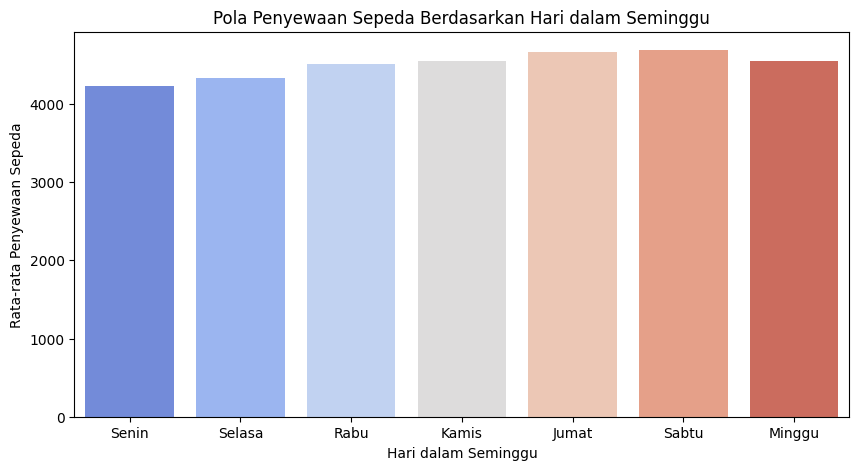

In [76]:
# Hitung rata-rata penyewaan sepeda per hari dalam seminggu
weekday_avg = day.groupby("weekday")["cnt"].mean()

# Ubah indeks menjadi nama hari
weekday_labels = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
weekday_avg.index = weekday_labels

# Visualisasi rata-rata penyewaan sepeda per hari
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette="coolwarm")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.show()


**Insight:**

- Hari kerja (Senin - Jumat) menunjukkan tren peningkatan bertahap dari Senin (4228.83) hingga Jumat (4667.26). Ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai moda transportasi ke tempat kerja atau aktivitas harian lainnya.
- Akhir pekan (Sabtu & Minggu) memiliki jumlah penyewaan yang tinggi, dengan Sabtu (4690.29) menjadi hari dengan penyewaan tertinggi dalam seminggu, diikuti oleh Minggu (4550.54). Ini mungkin karena lebih banyak orang menggunakan sepeda untuk rekreasi atau perjalanan santai.
- Penyewaan sepeda tertinggi terjadi pada hari Sabtu, sedangkan terendah pada hari Senin

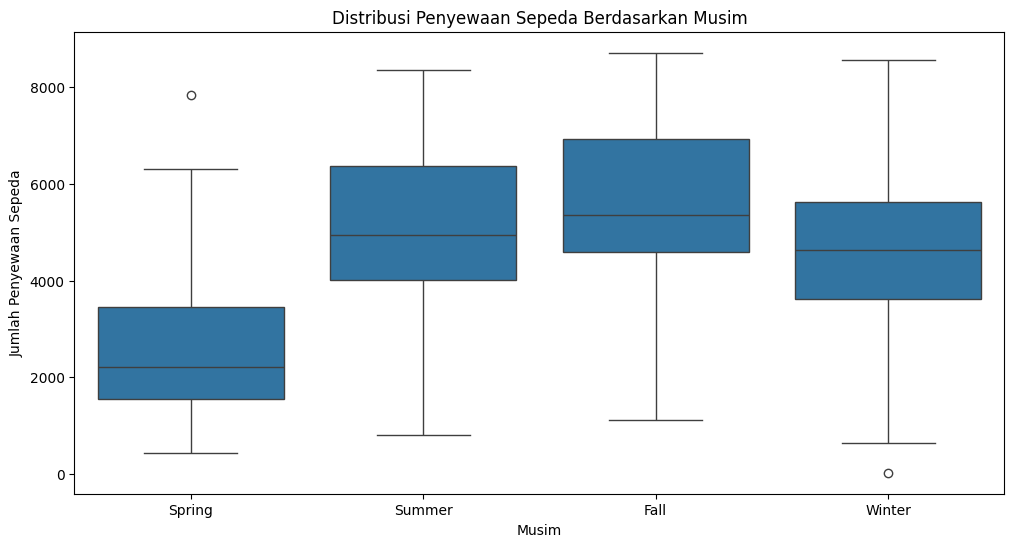

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="season", y="cnt", data=day)
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.show()


**Insight:**

- Musim Gugur (Fall) memiliki jumlah penyewaan tertinggi, dengan median yang lebih tinggi dibandingkan musim lainnya dan distribusi data yang lebih luas. Ini menunjukkan bahwa musim gugur adalah periode paling ramai untuk penyewaan sepeda.
- Musim Semi (Spring) memiliki jumlah penyewaan terendah, dengan median lebih rendah dan banyak data di bawah nilai tengah dibandingkan musim lainnya. Hal ini mungkin disebabkan oleh kondisi cuaca yang masih relatif dingin di awal tahun.
- Musim Panas (Summer) dan Musim Dingin (Winter) memiliki jumlah penyewaan yang relatif tinggi, tetapi masih di bawah Musim Gugur.
Terdapat outlier terutama di musim semi dan musim dingin, yang mungkin menunjukkan hari-hari tertentu dengan penyewaan yang jauh lebih rendah atau lebih tinggi dari biasanya.
-Secara keseluruhan, jumlah penyewaan sepeda cenderung lebih tinggi di musim panas dan gugur, kemungkinan karena cuaca yang lebih nyaman untuk bersepeda.

## Conclusion

- Secara umum, jumlah penyewaan sepeda dipengaruhi oleh berbagai faktor cuaca dan musim. Temperatur memiliki pengaruh positif sedang, artinya semakin hangat cuaca, semakin banyak sepeda yang disewa. Sebaliknya, kelembapan memiliki pengaruh negatif sedang, yang berarti penyewaan cenderung menurun saat kelembapan meningkat. Kecepatan angin hampir tidak berpengaruh terhadap jumlah penyewaan. Dari faktor kategorik, musim berpengaruh positif, di mana jumlah penyewaan lebih tinggi pada musim panas dan gugur dibandingkan musim semi dan dingin. Kondisi cuaca juga berpengaruh negatif, di mana penyewaan lebih tinggi saat cuaca cerah atau berawan sedikit, tetapi menurun saat cuaca mendung, hujan, atau bersalju. Dengan demikian, faktor lingkungan seperti suhu dan musim mendukung peningkatan penyewaan, sedangkan kelembapan tinggi dan kondisi cuaca buruk cenderung menurunkannya.
- Secara umum, puncak penyewaan terjadi pada pagi (07:00-09:00) dan sore hingga malam (16:00-19:00), mencerminkan penggunaan untuk perjalanan kerja atau sekolah, dengan jumlah penyewaan lebih rendah pada dini hari. Dalam seminggu, penyewaan stabil dengan peningkatan menjelang akhir pekan, terutama pada Jumat dan Sabtu, yang mungkin terkait dengan aktivitas rekreasi. Secara keseluruhan, pola penyewaan sepeda menunjukkan bahwa faktor lingkungan dan kebiasaan masyarakat sangat memengaruhi tingkat penggunaannya, dengan tren meningkat pada jam sibuk dan menjelang akhir pekan.